# Stock Market Prediction

## Overview

Accurate prediction of stock market asset is a significant and challenging task due to complicated nature of the financial stock markets. Considering the increasing availability and affordability of powerful computational engines, deep learning methods of prediction have proved its efficiency in finance.

## Business Understanding

A time series regression model using NN or other advanced techniques is built to predict the stock market. Stock market prediction aims to determine the future movement of the stock value of a financial exchange. This project is helpful for Stock investors and investment banks to have a better understanding in developing economical Strategy and in making financial decisions.

### Import Packages

In [1]:
import twint
import nest_asyncio
nest_asyncio.apply()

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Twint

In [9]:
%%capture
# Configuring Twint to search for the subject in the first specified city
c = twint.Config()

# The amount of tweets to return sorted by most recent
c.Limit = 1

# Input parameters
c.Search = "$AAPL"

# Removing retweets
c.Filter_retweets = True

# No pictures or video
c.Media = False

# English only
c.Lang ='en'

# Excluding tweets with links
c.Links ='exclude'

# Making the results pandas friendly
c.Pandas = True

twint.run.Search(c)

# Assigning the DF
df = twint.storage.panda.Tweets_df

In [11]:
df.shape

(100, 38)

In [12]:
def sentiment_class(score):
    """
    Labels each tweet based on its sentiment score
    """
    if score > 0:
        score = "Positive"
    elif score < 0:
        score ='Negative'
    else:
        score = 'Neutral'
        
    return score

In [14]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mbcn345/nltk_data...


True

In [15]:
# Instantiating the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Grabbing the sentiment scores and assigning them to a new column
df['sentiment'] = [sid.polarity_scores(df.tweet.iloc[i])['compound'] for i in range(len(df))]

# Labeling the tweets in a new column
df['feel'] = df.sentiment.apply(sentiment_class)

Neutral     43
Positive    42
Negative    15
Name: feel, dtype: int64


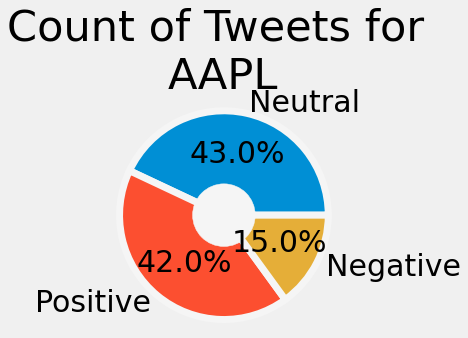

In [21]:
print(df.feel.value_counts())

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots()

ax.pie(list(df.feel.value_counts()), 
       labels=df.feel.value_counts().index, 
       autopct='%1.1f%%',
       wedgeprops = { 'linewidth': 7, 'edgecolor': 'whitesmoke' })

circle = plt.Circle((0,0), 0.3, color='whitesmoke')
fig = plt.gcf()
fig.gca().add_artist(circle)

ax.set_title(f"Count of Tweets for \n{'AAPL'}")
ax.axis('equal')
plt.show()

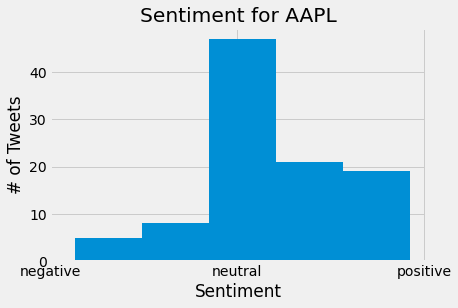

In [23]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Plotting the sentiment scores
ax.hist(df['sentiment'], bins=5)

plt.title(f"Sentiment for {'AAPL'}")
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("# of Tweets")
plt.show()

In [24]:
def available_columns():
    return twint.output.panda.Tweets_df.columns

def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]


In [25]:
df_pd = twint_to_pandas(["date", "username", "tweet", "hashtags", "nlikes"])

In [35]:
from optimus import Optimus
op = Optimus()

ModuleNotFoundError: No module named 'optimus'

In [26]:
df = op.create.data_frame(pdf= df_pd)

NameError: name 'op' is not defined